# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

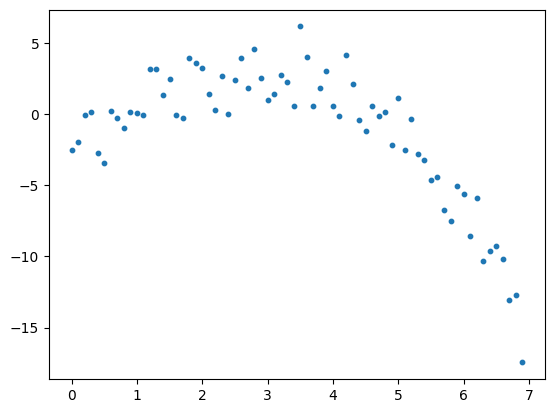

In [3]:
import matplotlib.pyplot as plt
# Your code for scatterplot here

x_data = xy_data[:,0]
y_data = xy_data[:,1]


plt.scatter(x_data, y_data, s=10)
plt.show()

### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [47]:
def polyreg(data_matrix, k):
    # Your code here
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
    if np.shape(data_matrix)[0] <= k:
        k = np.shape(data_matrix)[0] - 1
    x = data_matrix[:,0]
    all_ones = np.ones(np.shape(x))
    x2 = np.matrix(all_ones).T
    for i in range(k):
        x2 = np.column_stack((x2, x**(i+1)))
    yvalues = data_matrix[:,1]

    beta_quad = np.linalg.lstsq(x2, yvalues, rcond=None)[0]
    yfit = x2.dot(np.matrix(beta_quad).T).T
    residuals = yvalues - yfit
    return beta_quad, yfit.T, np.array(residuals).ravel()

    

Use the tests below to check the outputs of the function you have written:

In [48]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0]
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals
assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

SSE_2:  172.18102528988553
SSE_3:  152.4058048891581
SSE_4:  151.2277896902711
R^2 k=2  0.8876
R^2 k=3  0.9005
R^2 k=4  0.9013


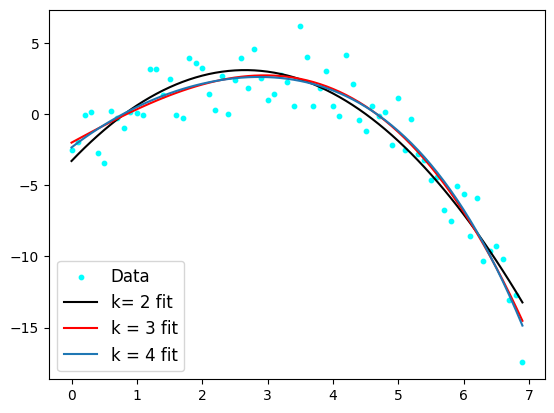

In [49]:
#Your code here
beta_0, yfit_0, res_0 = polyreg(xy_data, k=0)
beta_2, yfit_2, res_2 = polyreg(xy_data, k=2)
beta_3, yfit_3, res_3 = polyreg(xy_data, k=3)
beta_4, yfit_4, res_4 = polyreg(xy_data, k=4)
SSE_0 = np.linalg.norm(res_0)**2
SSE_2 = np.linalg.norm(res_2)**2
SSE_3 = np.linalg.norm(res_3)**2
SSE_4 = np.linalg.norm(res_4)**2
print("SSE_2: ", SSE_2)
print("SSE_3: ", SSE_3)
print("SSE_4: ", SSE_4)

print('R^2 k=2 ', np.round(1- SSE_2/SSE_0, decimals = 4))
print('R^2 k=3 ', np.round(1- SSE_3/SSE_0, decimals = 4))
print('R^2 k=4 ', np.round(1- SSE_4/SSE_0, decimals = 4))

plt.scatter(x_data, y_data, s=10, color = 'cyan', label = 'Data')   
plt.plot(x_data, yfit_2, color = 'black', label = 'k= 2 fit')
plt.plot(x_data, yfit_3, color = 'red', label = 'k = 3 fit')
plt.plot(x_data, yfit_4, label = 'k = 4 fit')  
plt.legend(fontsize = 'large')
plt.show()


 #### State which model you choose and briefly justify your choice.
 I would probably choose the model with k=3 because compared to k=2 there is a big difference but compared to k=4 there is not much difference so k=4 is probably not needed. The R^2 value is also higher for k=3 than k=2.
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

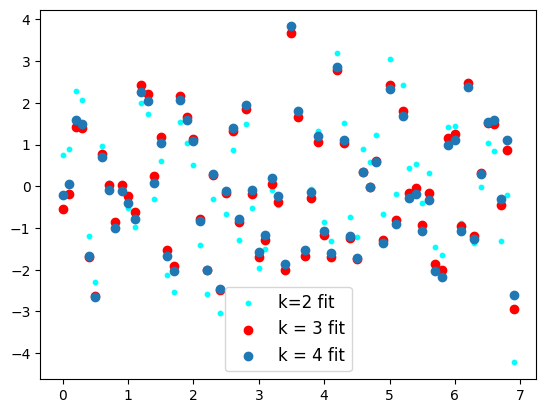

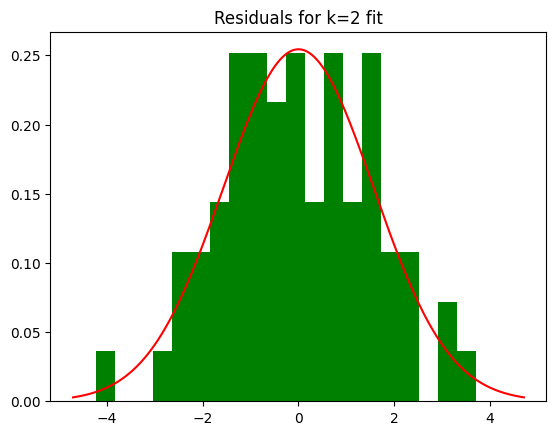

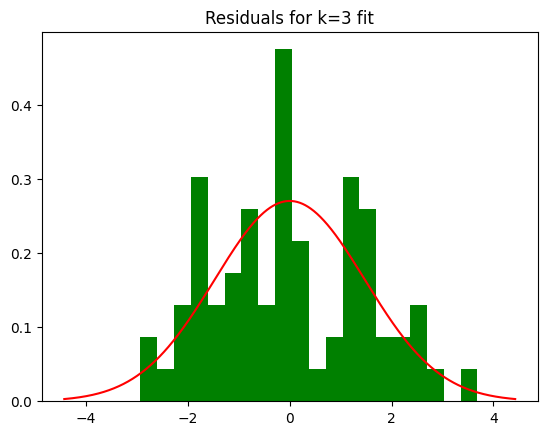

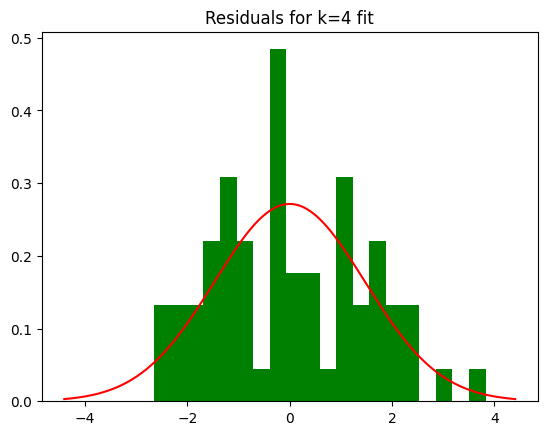

In [54]:
#Your code here
plt.scatter(x_data, res_2, s=10, color = 'cyan', label = 'k=2 fit') 
plt.scatter(x_data, res_3, color = 'red', label = 'k = 3 fit')
plt.scatter(x_data, res_4, label = 'k = 4 fit')
plt.legend(fontsize = 'large')
plt.show()

from scipy.stats import norm
n, bins, patches = plt.hist(res_2, bins=20, density=True, facecolor='green')
plt.title('Residuals for k=2 fit')
# Plot Gaussian pdf with same mean and variance as the residuals
res_quad_stdev = np.std(res_2)  #standard deviation of residuals
xvals = np.linspace(-3*res_quad_stdev,3*res_quad_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_quad_stdev), 'r')
plt.show()

n, bins, patches = plt.hist(res_3, bins=20, density=True, facecolor='green')
plt.title('Residuals for k=3 fit')
# Plot Gaussian pdf with same mean and variance as the residuals
res_quad_stdev = np.std(res_3)  #standard deviation of residuals
xvals = np.linspace(-3*res_quad_stdev,3*res_quad_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_quad_stdev), 'r')
plt.show()

n, bins, patches = plt.hist(res_4, bins=20, density=True, facecolor='green')
plt.title('Residuals for k=4 fit')
# Plot Gaussian pdf with same mean and variance as the residuals
res_quad_stdev = np.std(res_4)  #standard deviation of residuals
xvals = np.linspace(-3*res_quad_stdev,3*res_quad_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_quad_stdev), 'r')
plt.show()